In [20]:
from skimage import data, segmentation, graph, color
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import linalg
import networkx as nx

import sys
sys.path.append("..")
from nc_suite import *

In [21]:
# Create img and labels
mnist = datasets.MNIST('data', train=True, download=True)
img = np.asarray(mnist[2][0])

labels = np.copy(img)
labels[labels>0] = 1

labels1 = segmentation.slic(img, compactness=10, n_segments=100, sigma=1, # n_segments refers to things which are compared to other things..
                            start_label=0, channel_axis=None)

out1 = color.label2rgb(labels1, img, kind='avg', bg_label=0)

rag = graph.rag_mean_color(img, labels1, mode='similarity', sigma=10, connectivity=2)

D, W = DW_matrices(rag)
ev = solve_ncut(D,W)
cut_mask, mcut = get_min_ncut(ev, D, W, 10) # num_cuts = 10,


ev = ev.reshape((28,28))
cut_mask = cut_mask.reshape((28,28))

print(mcut)

# TODO:
# https://github.com/scikit-image/scikit-image/blob/5e74a4a3a5149a8a14566b81a32bb15499aa3857/skimage/graph/_graph_cut.py#L246

/Users/garth/Desktop/DDN/notebooks/../nc_suite.py:100: RuntimeWarning: overflow encountered in multiply
  A = d2 * (d2 - W) * d2 # TODO: is this supposed to be D-W in middle, and if so.. scikit-learn is wrong? or still right?


ValueError: cannot reshape array of size 81 into shape (28,28)

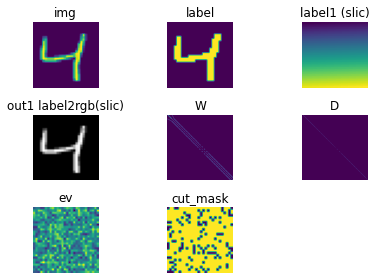

In [ ]:
plot_images([img, labels, labels1, out1, W, D, ev, cut_mask], ['img', 'label', 'label1 (slic)', 'out1 label2rgb(slic)', 'W', 'D', 'ev', 'cut_mask'])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

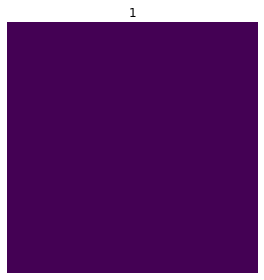

In [ ]:
rag = graph.rag_mean_color(img, labels, mode='similarity')
new_labels = graph.cut_normalized(labels, rag)
print(new_labels)
plot_images([new_labels])